<a href="https://colab.research.google.com/github/Raghad770/NLP-Hands-on/blob/main/Transformers_Anatomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Attention Eplaination

1️⃣ Self-Attention (like in BERT’s encoder)



```
# Input tokens: [The] [cat] [sat] [down]

Each token looks at *all* tokens in the same sentence:
    The   → looks at The, cat, sat, down
    cat   → looks at The, cat, sat, down
    sat   → looks at The, cat, sat, down
    down  → looks at The, cat, sat, down

(all inside SAME layer)
```
Purpose: Each token’s meaning is updated based on the context of the entire sequence.

2️⃣ Encoder–Decoder Attention (old RNN-based sequence-to-sequence)


```
# Encoder input:  [The] [cat] [sat] [down]

Decoder is generating a translation word-by-word:
At current decoder step → compare *decoder hidden state* to ALL encoder outputs
                         ↓
Attention finds which encoder words are most relevant

```
Purpose: Decoder focuses on specific encoder words when predicting the next output word.
✅ Key Difference:

    Self-attention: Tokens within the same set attend to each other.

    Encoder–decoder attention: Decoder tokens attend to the encoder’s outputs.



The model looks at other tokens in the sequence, calculates how relevant each one is to the current token, and uses that information when updating its representation.


    It computes attention weights — numbers showing how much importance to give to each other token.

    The token then “attends” more to the tokens with higher weights, meaning it will take more information from them when creating its new embedding.

📌 Example:
Sentence: "The cat sat on the mat"
If the model is processing "cat", attention might decide:

    "The" → weight 0.2 (low relevance)

    "cat" → weight 1.0 (itself is always fully relevant)

    "sat" → weight 0.8 (moderately relevant – it tells what the cat did)

    "mat" → weight 0.5 (some relevance)

Here we say "cat" attends most to itself and "sat", because they have higher weights.


1️⃣ Token embeddings

When a model like BERT processes a sentence, each word (token) is turned into a high-dimensional vector — an embedding — representing its meaning.
Example:
```
# Sentence: "Time flies like an arrow"
Tokens:   [Time], [flies], [like], [an], [arrow]
Embeddings: E1, E2, E3, E4, E5  (each might be 768 numbers long)

```
2️⃣ Attention weights w_ji

In self-attention, the model learns for each token i (for example, “flies”) how much to focus on each other token j based on their relationship.

For example, if we’re focusing on "flies":

```
# w_to_Time  = 0.1  
w_to_flies = 0.3  
w_to_like  = 0.3  
w_to_an    = 0.1  
w_to_arrow = 0.2  

```
These are attention weights, and they are normalized so that they sum to 1.0.


---

3️⃣ Averaging the token embeddings (weighted average)

After calculating the weights, the model combines all the other token embeddings into a single new vector for "flies" — by taking a weighted average:

```
# New "flies" embedding =
  (0.1 * E_time) +
  (0.3 * E_flies) +
  (0.3 * E_like) +
  (0.1 * E_an) +
  (0.2 * E_arrow)

```
✅ In short:

    The “averaging” means combining all token embeddings into a context-aware version of the token you’re focusing on, weighted by attention weights.

    This averaging gives each token a meaning that depends on the words around it.





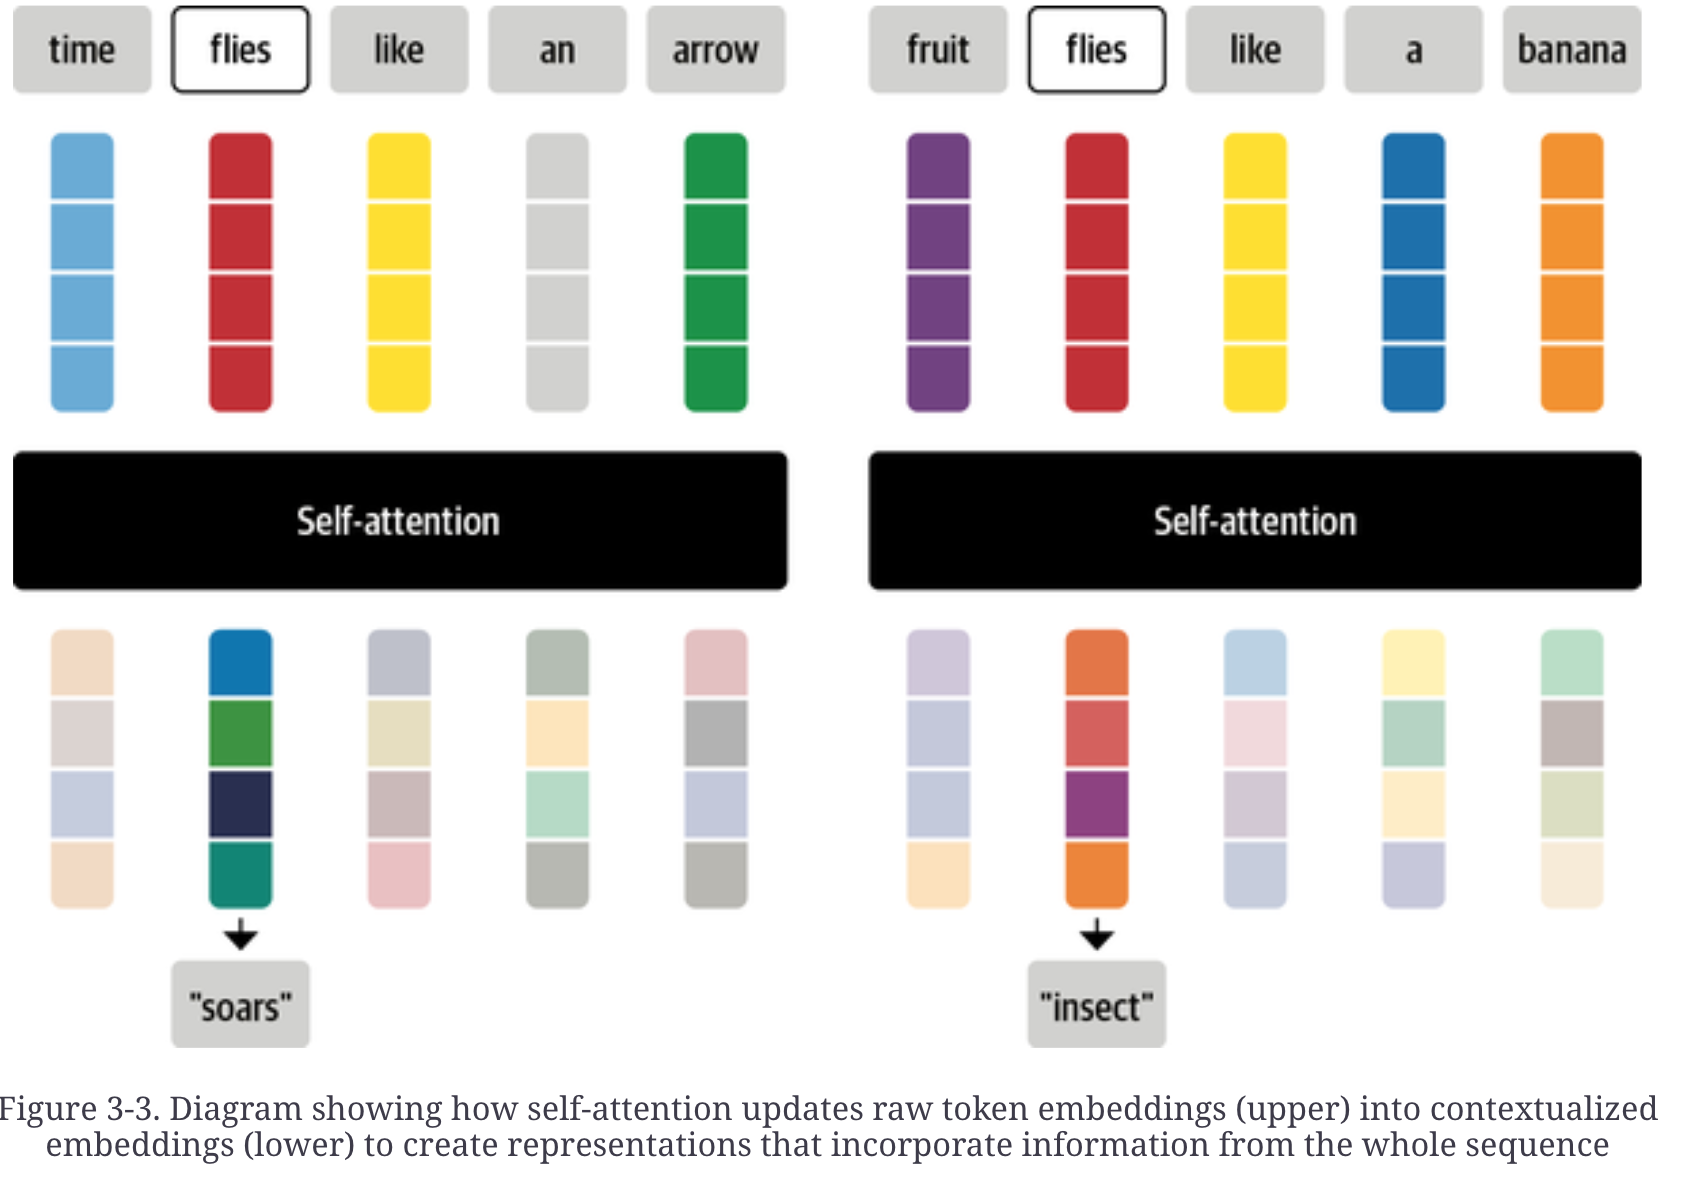

# Implement Self-attention layer


> This library provides several functions that can be used to visualize different aspects of attention in transformer model:https://github.com/jessevig/bertviz




**Scaled dot-product attention**

Step-by-step explanation

    Make 3 versions of each token embedding

    1.For each token in your sentence, the model creates three different vectors:

            - Query (Q) → asks: "What am I looking for?"

            - Key (K) → represents: "What do I contain?"

            - Value (V) → holds the actual information to be shared.

    2.Find how much tokens relate to each other (attention scores)

        We measure how much each token's Query matches other tokens' Keys using the dot product.

        This produces an n × n matrix (n = number of tokens), where each cell shows how strongly one token is related to another.

    3.Turn scores into attention weights

        The raw dot products can be big numbers. We:

            Scale them down (divide by a factor — usually √embedding size) to keep numbers stable.

            Softmax them so each row sums to 1 → now they’re probabilities (weights).

        These weights (wᵢⱼ) tell us: How much should token i pay attention to token j?

    4.Update each token’s embedding

        For each token, take a weighted sum of all the Value vectors using the attention weights.

        This mixing process gives each token a new, context-aware embedding — its meaning adjusted based on all other tokens in the sequence.


The Q (Query), K (Key), and V (Value) vectors in a Transformer are all derived from the original token embeddings but serve different roles in the self-attention mechanism. Here's a clear explanation focusing on their values and sizes

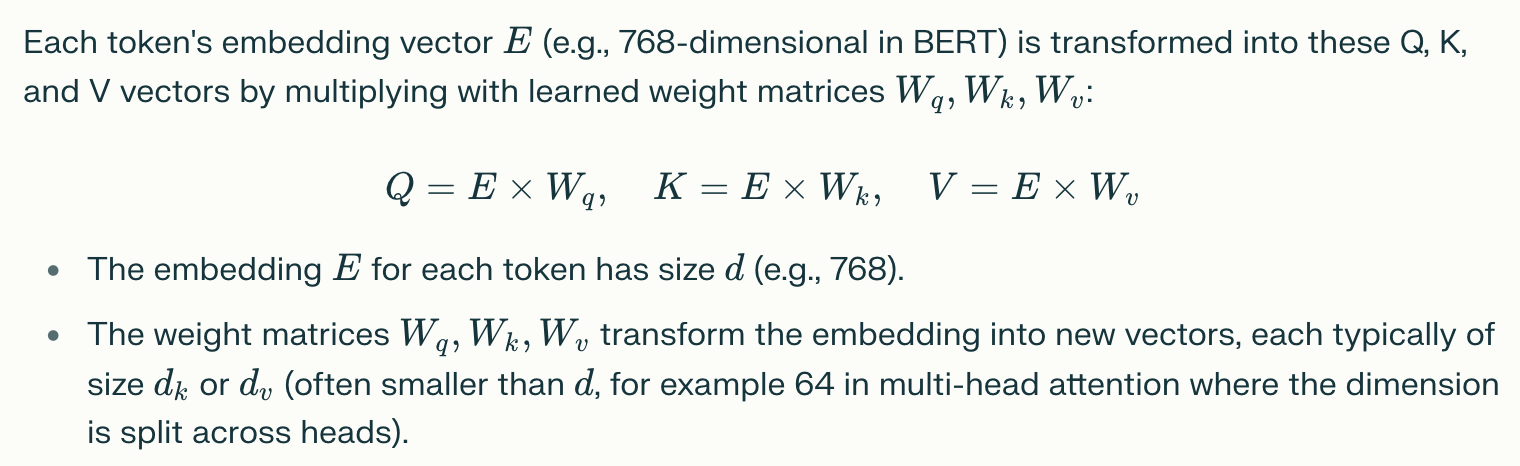


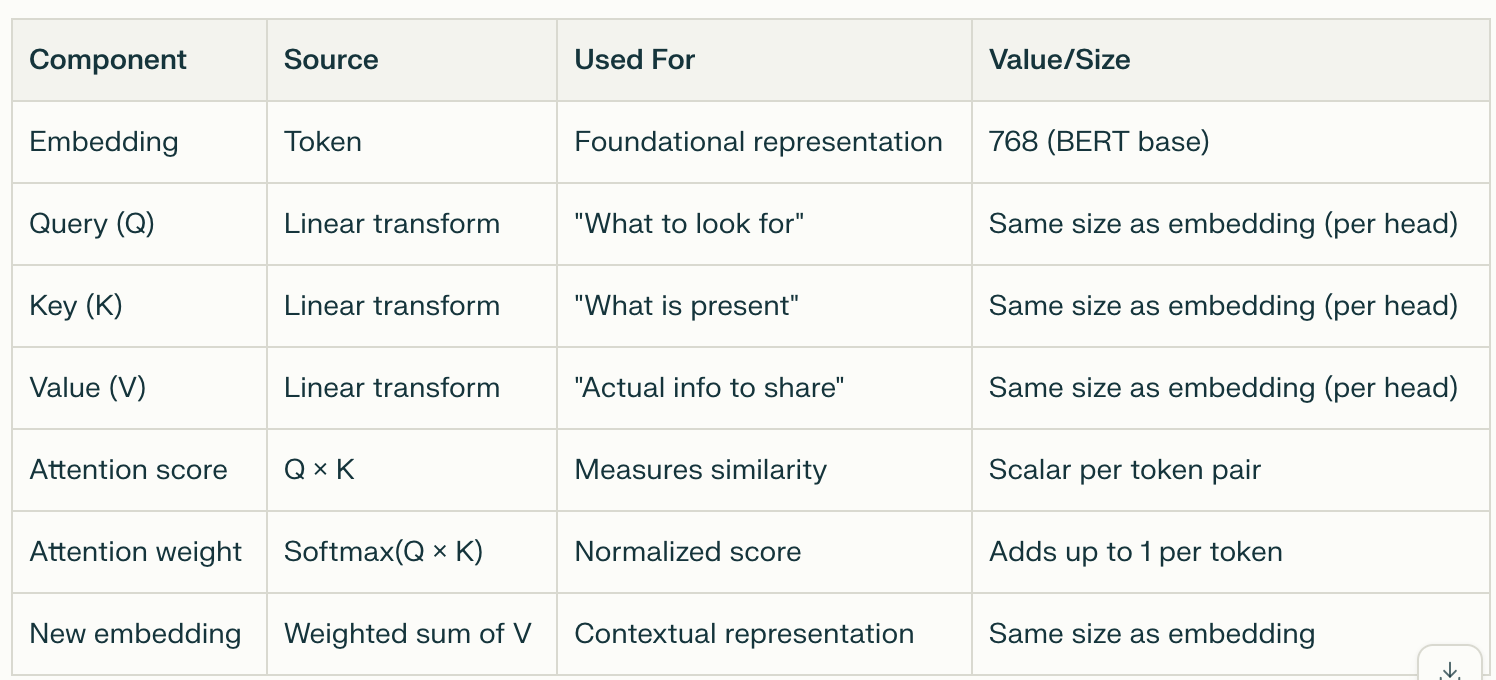

# BertViz

In [2]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)
text = "time flies like an arrow"
show(model, "bert", tokenizer, text, display_mode="light", layer=0, head=8)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

100%|██████████| 440473133/440473133 [00:27<00:00, 15788980.09B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Build Transformer Architecture

# self-attention

1. Tokinze Text

In [4]:
inputs = tokenizer(text,return_tensors='pt',add_special_tokens=False)
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

2. Create Dense Embeddings


> we need to create some dense embeddings. Dense in this context means that each entry in the embeddings contains a nonzero value. In contrast, the one-hot encodings are sparse, since all entries except one are zero. In PyTorch, we can do this by using a torch.nn.Embedding layer that acts as a lookup table for each input ID



In [5]:
from torch import nn
from transformers import AutoConfig

config = AutoConfig.from_pretrained(model_ckpt)
token_emb=nn.Embedding(config.vocab_size,config.hidden_size)
token_emb

Embedding(30522, 768)

the AutoConfig class to load the config.json file associated with the bert-base-uncased checkpoint

In [6]:
type(token_emb)

torch.nn.modules.sparse.Embedding

**A simple lookup table that stores embeddings of a fixed dictionary and size.**

**This module is often used to store word embeddings and retrieve them using indices.**

3. Generate the embeddings by feeding in the input IDs

In [7]:
input_embeds=token_emb(inputs.input_ids)
input_embeds.size()

torch.Size([1, 5, 768])

4.Create the query, key, value vectors and calculate the attentions scores using the dot product as the similarity function

In [8]:
import torch
from math import sqrt

query = key = value = input_embeds
dim_k = key.size(-1)
scores = torch.bmm(query,key.transpose(1,2)/sqrt(dim_k))
scores.size()


torch.Size([1, 5, 5])

In [9]:
print(scores)

tensor([[[ 2.9097e+01, -1.0801e-02, -6.4474e-02,  4.2388e-01,  2.9691e-01],
         [-1.0801e-02,  2.7894e+01, -7.9725e-02,  2.7705e-01, -6.9733e-01],
         [-6.4474e-02, -7.9725e-02,  2.7098e+01, -1.0830e+00,  1.1816e+00],
         [ 4.2388e-01,  2.7705e-01, -1.0830e+00,  2.7373e+01, -1.5152e+00],
         [ 2.9691e-01, -6.9733e-01,  1.1816e+00, -1.5152e+00,  2.9333e+01]]],
       grad_fn=<BmmBackward0>)




* The model processes multiple sentences (batch_size),

* Each sentence has multiple tokens (seq_length),

* For each token in each sentence, you have corresponding Q, K, and V vectors.


The torch.bmm() function performs a batch matrix-matrix product that simplifies the computation of the attention scores where the query and key vectors have the shape [batch_size, seq_len, hidden_dim]

The function nn.bmm() in PyTorch stands for batch matrix-matrix multiplication. It performs matrix multiplication on a batch (collection) of pairs of matrices at once.

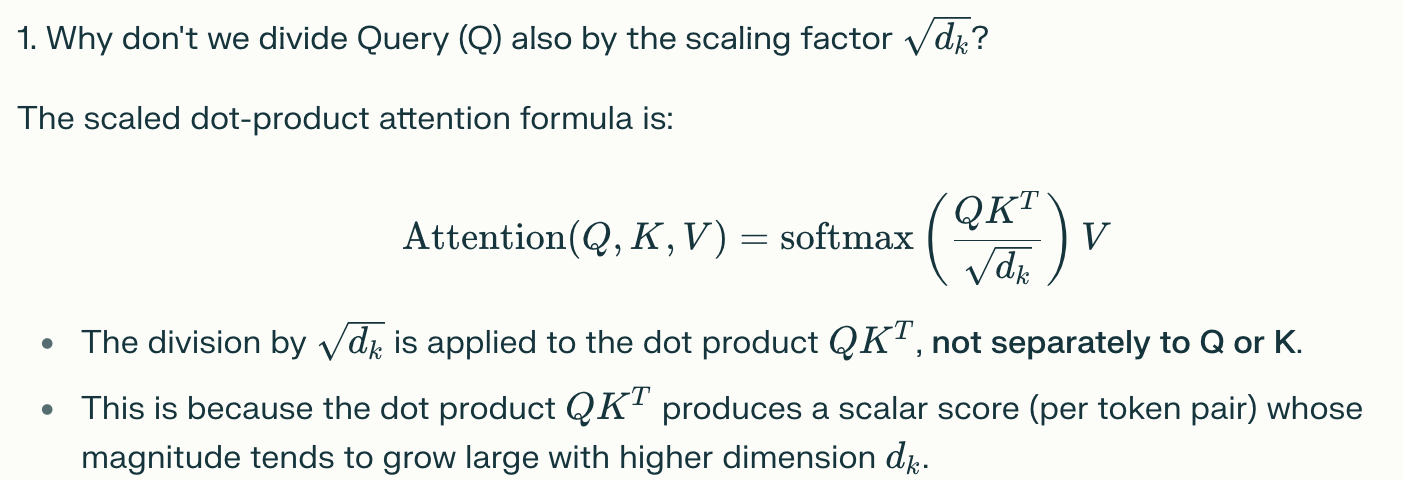

5. Apply softmax

In [10]:
import torch.nn.functional as F

weights = F.softmax(scores,dim=-1)
# weights.sum(dim=-1)



Softmax turns these raw scores into a set of probabilities for each token:

    All values will be between 0 and 1.

    The sum of probabilities in each row is exactly 1 (they form a probability distribution).



In [11]:
weights

tensor([[[1.0000e+00, 2.2829e-13, 2.1636e-13, 3.5259e-13, 3.1055e-13],
         [7.6064e-13, 1.0000e+00, 7.0998e-13, 1.0144e-12, 3.8284e-13],
         [1.5978e-12, 1.5736e-12, 1.0000e+00, 5.7702e-13, 5.5552e-12],
         [1.9783e-12, 1.7081e-12, 4.3840e-13, 1.0000e+00, 2.8455e-13],
         [2.4537e-13, 9.0786e-14, 5.9436e-13, 4.0070e-14, 1.0000e+00]]],
       grad_fn=<SoftmaxBackward0>)

In [12]:
weights.shape

torch.Size([1, 5, 5])

6. The final step is to multiply the attention weights by the values:



In [13]:
attn_outputs = torch.bmm(weights,value)
attn_outputs.shape

torch.Size([1, 5, 768])

wrapped function

In [14]:
def scaled_dot_product_attention(query, key, value):
    dim_k = query.size(-1)
    scores = torch.bmm(query, key.transpose(1, 2)) / sqrt(dim_k)
    weights = F.softmax(scores, dim=-1)
    return torch.bmm(weights, value)

# Multi-headed attention




> Let’s allow the model to create a different set of vectors for the query, key, and value of a token by using three different linear projections to project our initial token vector into three different spaces.



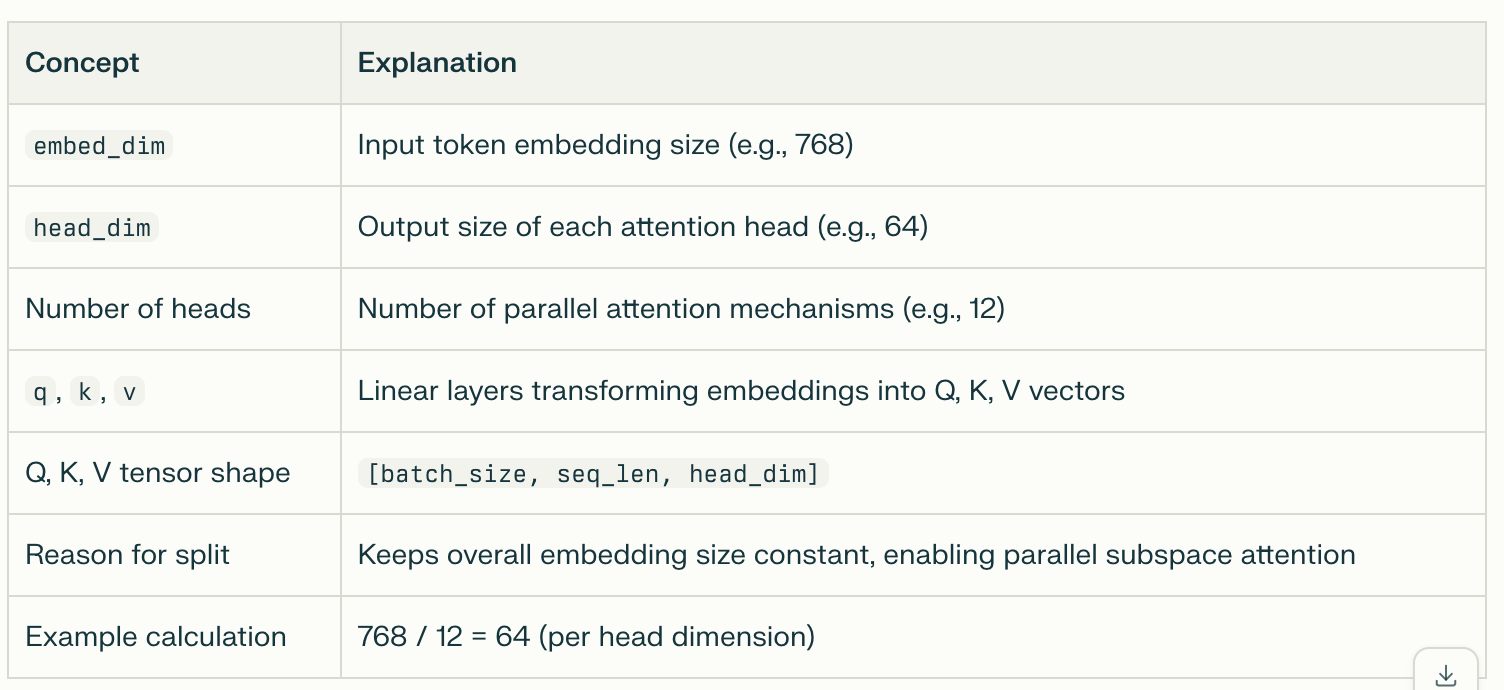

In [15]:
class AttentionHead(nn.Module):
  def __init__(self, embed_dim, head_dim):
    super().__init__()
    self.q = nn.Linear(embed_dim, head_dim)
    self.k = nn.Linear(embed_dim, head_dim)
    self.v = nn.Linear(embed_dim, head_dim)
  def forward(self, hidden_state):
    attn_outputs = scaled_dot_product_attention(self.q(hidden_state),
                                                self.k(hidden_state), self.v(hidden_state))
    return attn_outputs

we can concatenate the outputs of each one to implement the full multi-head attention layer:

In [16]:
class MultiHeadAttention(nn.Module):
  def __init__(self, config):
    super().__init__()
    embed_dim = config.hidden_size
    num_heads = config.num_attention_heads
    head_dim = embed_dim // num_heads
    self.heads = nn.ModuleList([AttentionHead(embed_dim, head_dim) for _ in range(num_heads)])
    self.output_linear = nn.Linear(embed_dim,embed_dim)
  def forward(self, hidden_state):
    x = torch.cat([h(hidden_state) for h in self.heads], dim =-1)
    x = self.output_linear(x)
    return x

In [17]:
multihead_attn = MultiHeadAttention(config)
attn_output = multihead_attn(input_embeds)
attn_output.size()

torch.Size([1, 5, 768])

let’s use BertViz again to visualize the attention for two different uses of the word “flies”. Here we can use the head_view() function from BertViz by computing the attentions of a pretrained checkpoint and indicating where the sentence boundary lies:

In [18]:
from bertviz import head_view
from transformers import AutoModel

model = AutoModel.from_pretrained(model_ckpt, output_attentions=True)
sentence_a = "time flies like an arrow"
sentence_b = "fruit flies like a banana"
viz_inputs = tokenizer(sentence_a, sentence_b, return_tensors='pt')
attention = model(**viz_inputs).attentions
sentence_b_start = (viz_inputs.token_type_ids ==0).sum(dim=1)
tokens = tokenizer.convert_ids_to_tokens(viz_inputs.input_ids[0])
head_view(attention, tokens, sentence_b_start,heads=[8])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

# Some Explaination for the prev code

**h(hidden_state):**

    Here, h is one AttentionHead object from self.heads (remember, self.heads is a ModuleList of separate attention heads).

    When you call h(hidden_state), it runs:

        The Q, K, V linear projections on that hidden_state

        The scaled dot-product attention using those Q, K, V

        Produces that head’s output:

        text
        shape = (batch_size, seq_len, head_dim)

    Each head processes the same input in parallel, but learns its own projection matrices, so each head “attends” differently to the sequence.

So, [h(hidden_state) for h in self.heads] produces a list of head outputs, one per attention head.



    You concatenated all head outputs along the last dimension.

    Shape went from:

        Per head: (batch_size, seq_len, head_dim)

        After concat: (batch_size, seq_len, num_heads * head_dim)
        which is usually (batch_size, seq_len, embed_dim) since num_heads * head_dim = embed_dim.


The core idea behind multi-head attention is that even though each attention head receives the same input embeddings, they attend differently and learn different features because:
1. Each head has its own learned projection matrices for Q, K, and V


Because each head’s projections are different, each head learns to focus on different relationships or aspects in the data.

For example:

    One head might learn to focus on positional relationships,

    Another might specialize in semantic similarity,

    Another might detect syntactic structures.



# Feed-Forward Layer

1️⃣ What is the feed-forward sublayer in a Transformer?

    In the Transformer encoder and decoder, after the attention step, there is a feed-forward network.

    It’s basically a tiny two-layer fully connected neural network (MLP) that is applied after attention.

    Twist: Instead of treating the whole sequence at once, it processes each token’s embedding separately but in the exact same way.




* The same feed-forward layers are applied individually to each token’s vector → no mixing between tokens here.

* That’s why it’s called position‑wise feed‑forward:
same layers, same weights, applied independently per position in the sequence.




    Between the two layers, they use a non-linear activation function — most commonly GELU (Gaussian Error Linear Unit).

    GELU works well for Transformers and helps retain richer gradient information than ReLU.


In [19]:
class FeedForward(nn.Module):
  def __init__(self,config):
    super().__init__()
    self.linear_1 = nn.Linear(config.hidden_size, config.intermediate_size)
    self.linear_2 = nn.Linear(config.intermediate_size,config.hidden_size)
    self.gelu = nn.GELU()
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

  def forward(self, x):
    x = self.linear_1(x)
    x = self.gelu(x)
    x = self.linear_2(x)
    x = self.dropout(x)
    return x


nn.Linear: It takes each input vector and transforms it to a new space of a different (or same) size by multiplying with weights and adding a bias.
- **`in_features`** → Size of each input vector.
Here: `config.hidden_size` — the size of the input from the previous layer.
- **`out_features`** → Size of each output vector.
Here: `config.intermediate_size` — the size after transformation.
- **`bias`** (default `True`) → Whether to add a bias vector $b$.

In [20]:
feed_forward = FeedForward(config)
ff_outputs = feed_forward(attn_outputs)
ff_outputs.size()

torch.Size([1, 5, 768])

# Adding Layer Normalization

The former normalizes each input in the batch to have zero mean and unity variance

In [21]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.layer_norm_1 = nn.LayerNorm(config.hidden_size)
        self.layer_norm_2 = nn.LayerNorm(config.hidden_size)
        self.attention = MultiHeadAttention(config)
        self.feed_forward = FeedForward(config)

    def forward(self, x):
        # Apply layer normalization and then copy input into query, key, value
        hidden_state = self.layer_norm_1(x)
        # Apply attention with a skip connection
        x = x + self.attention(hidden_state)
        # Apply feed-forward layer with a skip connection
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x


In [22]:
encoder_layer = TransformerEncoderLayer(config)
input_embeds.shape, encoder_layer(input_embeds).size()

(torch.Size([1, 5, 768]), torch.Size([1, 5, 768]))

# Positional Embeddings


In [23]:
class Embeddings(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.token_embeddings = nn.Embedding(config.vocab_size,config.hidden_size)
    self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
    self.layer_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
    self.dropout = nn.Dropout()
  def forward(self, input_ids):
    seq_lenght = input_ids.size(1)
    position_ids = torch.arange(seq_lenght, dtype=torch.long).unsqueeze(0)
    token_embeddings = self.token_embeddings(input_ids)
    position_embeddings = self.position_embeddings(position_ids)
    embeddings = token_embeddings + position_embeddings
    embeddings = self.layer_norm(embeddings)
    embeddings = self.dropout(embeddings)
    return embeddings

* torch.arange(seq_length, dtype=torch.long)

    Creates a 1D tensor of integers from 0 to seq_length-1.
* .unsqueeze(0)

    Adds a new dimension at index 0.

    The original tensor shape: [seq_length] (just a 1D vector).

    After unsqueezing: [1, seq_length].
    
"By having shape (1, seq_length), PyTorch can automatically copy (broadcast) that row to match the batch size."

In [24]:
embedding_layer = Embeddings(config)
embedding_layer(inputs.input_ids).size()

torch.Size([1, 5, 768])

# Absolute positional representations && Relative positional representations

Absolute Positional Representations

    Idea:
    Each token gets a unique code (vector) based on its position in the sequence (1st, 2nd, 3rd, …).

    How it works:

        For a sequence like "The cat sat on the mat", each word gets a position:
        The (0), cat (1), sat (2), on (3), the (4), mat (5)

        Transformer creates a vector for each position using formulas with sine and cosine waves:

            Example for position 3:
            [sin(...), cos(...), sin(...), cos(...)]

            These patterns help the model “know” if the word is at the start, middle, end, etc.

        The position vectors are added to the word embeddings before processing by the model.

    Use case:
    Works well in models trained on limited data — these position codes are static and easy to compute.as BERT, GPT
    


Relative Positional Representations

    Idea:
    How far apart are two tokens? The model cares more about relationships (“sat” is before “mat” by 3 words).

    How it works:

        Instead of just giving a position to each token, it also encodes the distance between tokens inside the attention mechanism.

        The embedding for a token depends on its relative position to other tokens in the attention calculation.

        This is useful because when deciding “how much should token A attend to token B”, the model knows not just their info, but how far apart they are.

    Use case:
    Powerful for language understanding tasks, especially in models like DeBERTa or TransformerXL.




    Absolute: Each token knows its position.

    Relative: Each token knows how far it is from others.


# Full transformer encoder combining the embeddings with the encoder layers

In [25]:
class TransformerEncoder(nn.Module):
  def __init__(self,config):
    super().__init__()
    self.embeddings = Embeddings(config)
    # TransformerEncoderLayer >> normalization, multiheadattention and feedforward
    # repeat the TransformerEncoderLayer with num of the hidden layers/ num of encoder layers
    self.layers = nn.ModuleList([TransformerEncoderLayer(config) for _ in range(config.num_hidden_layers)])

  def forward(self, x):
    x = self.embeddings(x)
    for layer in self.layers:
      x = layer(x)
    return x

In [26]:
encoder = TransformerEncoder(config)
encoder(inputs.input_ids).size()

torch.Size([1, 5, 768])

# Adding a Classification Head


 why and how only the first token is often used for classification with Transformers?



> For classification (e.g., “Is this sentence positive or negative?”), you want one prediction per sentence, not per token.

> During training, the model learns to pack information from the entire sentence into the hidden state of the first token (the [CLS] token).


> After the Transformer processing, we take only the [CLS] token’s hidden state (the embedding at position 0) and send it to a classification layer (usually a dropout → linear layer → activation like softmax).

> Using the first token is simple, efficient, and works well because the model is explicitly trained to summarize the sequence there.



In [27]:
class TransformerForSequenceClassification(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.encoder = TransformerEncoder(config)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)

  def forward(self, x):
    # [batch size, sequence lenght, hidden size]
    x = self.encoder(x)[:,0,:]
    x = self.dropout(x)
    x = self.classifier(x)
    return x

In [28]:
config.num_labels = 3
encoder_classifier = TransformerForSequenceClassification(config)
encoder_classifier(inputs.input_ids).size()

torch.Size([1, 3])

In [29]:
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

# The Decoder

# some explaination for the decoder

1. What’s special about the decoder?

    The decoder tries to generate text one token at a time (like when translating or writing a sentence).

    It has two attention layers:

        Masked self-attention: Looks only at current and previous tokens (not ahead—no “cheating”).

        Encoder-decoder attention: Lets the decoder “look at” the encoder’s output (useful for translation, etc.).


2. Why do we need masking in self-attention?

    When generating a sequence, the model must not look at future tokens.

    Example: If generating the 3rd word, it must only see the 1st and 2nd words (plus itself)—not the 4th, 5th, etc.

    Masking prevents the model from seeing ahead (during both training and inference).


3. How does the mask matrix work?

    The mask is a lower-triangular matrix:

        Ones (1) on and below the diagonal (tokens you’re allowed to see).

        Zeros (0) above the diagonal (tokens you’re not allowed to see).

    For a sequence of length 5, the mask looks like this:

    text

    [[1, 0, 0, 0, 0],

    [1, 1, 0, 0, 0],

    [1, 1, 1, 0, 0],
    
    [1, 1, 1, 1, 0],

    [1, 1, 1, 1, 1]]

    Row 0: Only token 0 can be seen.

    Row 1: Tokens 0 and 1.

    Row 2: Tokens 0, 1, and 2.

    ...and so on.


4. How is the mask used?

    Compute attention scores between all token pairs (how much each token attends to others).

    Apply the mask: Set the scores for the "forbidden" tokens (zeros in the mask) to negative infinity (-inf) using scores.masked_fill(mask == 0, -float("inf")).

        This means when you do softmax later, those spots become zero probability (the model can’t attend to them at all).

For example:
After masking, scores for "future" tokens (to the right in each row) become -inf, so the softmax will ignore them.

Summary (In Simple Words):

    The decoder uses a special mask so each position can only “see” itself and anything before it.

    This is done by making a matrix with ones below the diagonal and zeroes above it.

    The zeros are replaced with -inf, so when the model computes attention, it cannot “peek ahead.”

    This is essential for generating text, ensuring the model only knows “the past” at each step—never the future.


# the modifications we need to make to include masking in our self-attention layer



* mask matrix

In [30]:
seq_len = inputs.input_ids.size(-1)
mask = torch.tril(torch.ones(seq_len, seq_len)).unsqueeze(0)
mask[0]


tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [32]:
scores.masked_fill(mask == 0, -float("inf"))

tensor([[[ 2.9097e+01,        -inf,        -inf,        -inf,        -inf],
         [-1.0801e-02,  2.7894e+01,        -inf,        -inf,        -inf],
         [-6.4474e-02, -7.9725e-02,  2.7098e+01,        -inf,        -inf],
         [ 4.2388e-01,  2.7705e-01, -1.0830e+00,  2.7373e+01,        -inf],
         [ 2.9691e-01, -6.9733e-01,  1.1816e+00, -1.5152e+00,  2.9333e+01]]],
       grad_fn=<MaskedFillBackward0>)

We can easily include this masking behavior with a small change to our scaled dot-product attention function that we implemented earlier

In [ ]:
def scaled_dot_product_attention(query, key, value, mask=None):
    dim_k = query.size(-1)
    scores = torch.bmm(query, key.transpose(1, 2)) / sqrt(dim_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, float("-inf"))
    weights = F.softmax(scores, dim=-1)
    return weights.bmm(value)

# Meet The Transformers

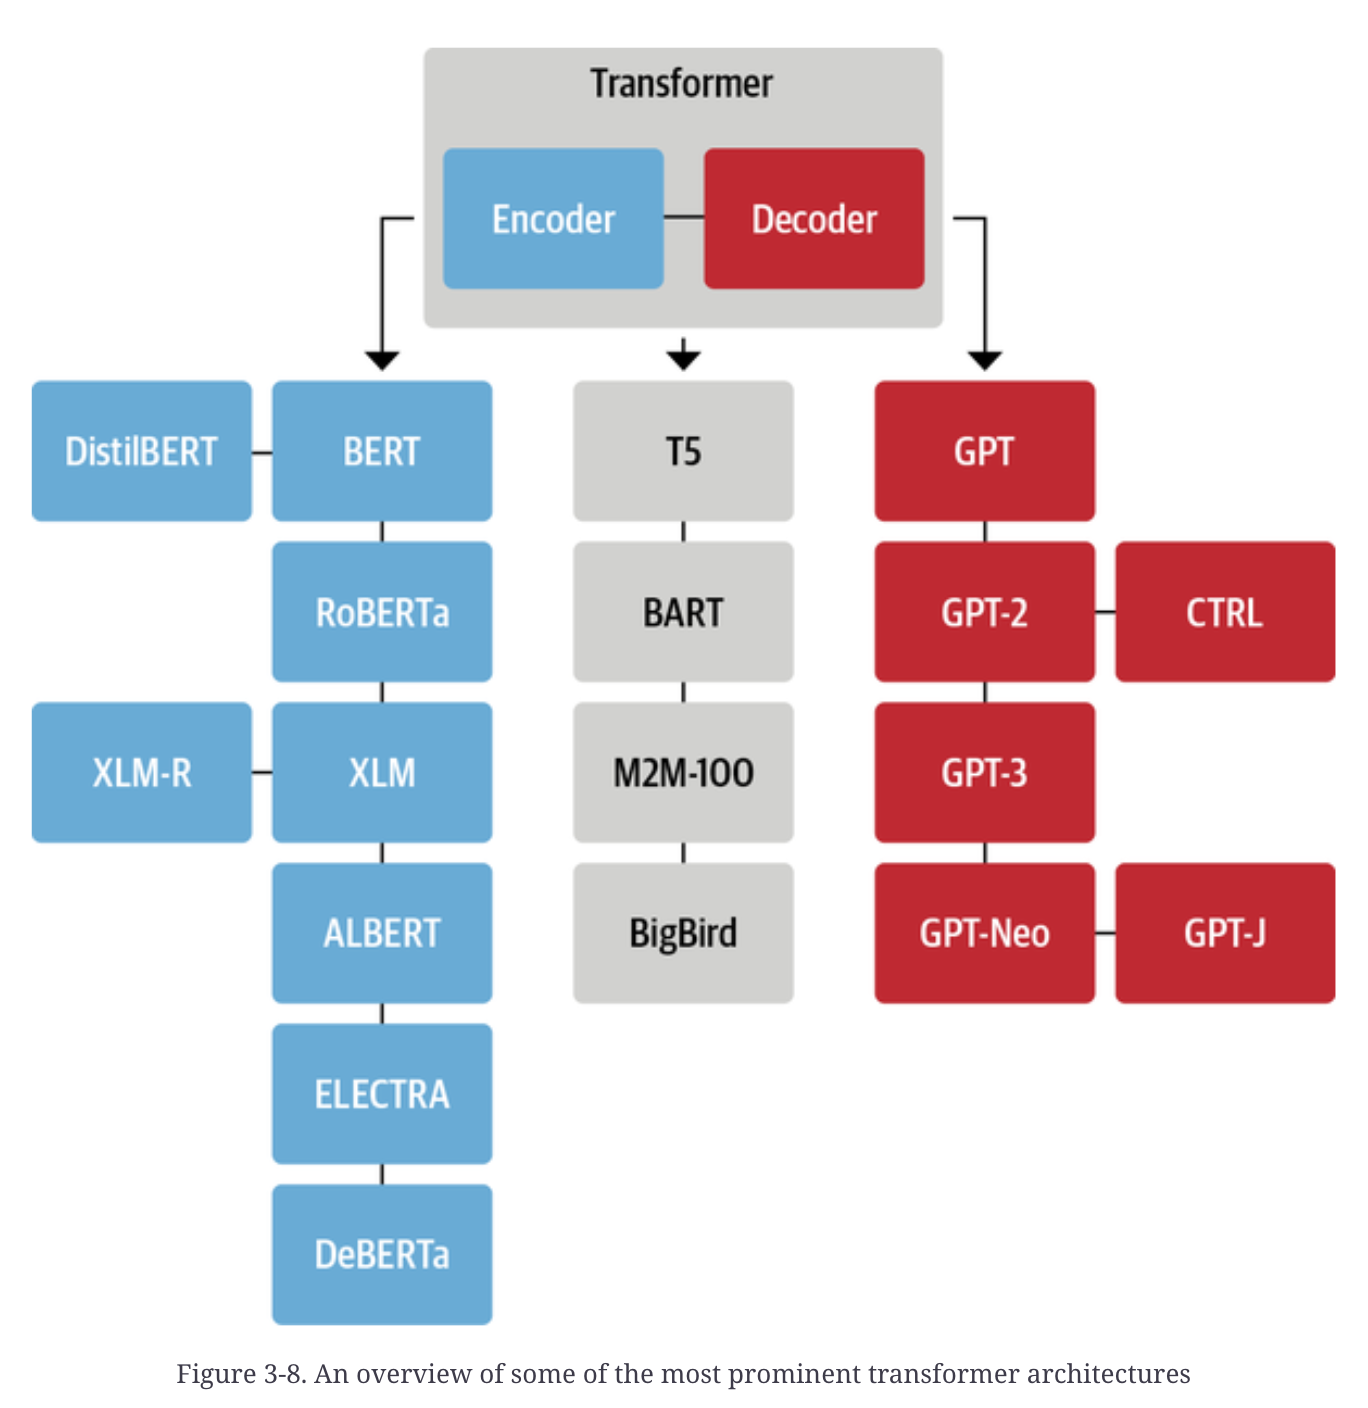

natural language processing (NLP),

natural language understanding (NLU),

and natural language generation (NLG)